In [44]:
# DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [45]:
# SKLear
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# helpers
%matplotlib inline

In [46]:
# plotting pretty figures and avoid blurry images
# %config InlineBackend.figure_format = 'retina'

# larger scale for plots in notebooks
# sns.set_context('notebook')

In [47]:
data = pd.read_csv('Demographic_Data.csv')

In [48]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [49]:
# why drop duplicates? dataset does not contain unique transaction numbers.
# what exactly is this dropping?
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [50]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [51]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [52]:
data.info

<bound method DataFrame.info of        in-store  age  items   amount  region
0             0   37      4   281.03       2
1             0   35      2   219.51       2
2             1   45      3  1525.70       4
3             1   46      3   715.25       3
4             1   33      4  1937.50       1
...         ...  ...    ...      ...     ...
79995         1   71      3   558.82       1
79996         0   59      7  1932.00       3
79997         0   54      1   414.16       2
79998         1   49      4   335.32       1
79999         1   30      1   527.12       3

[79979 rows x 5 columns]>

<AxesSubplot:ylabel='Frequency'>

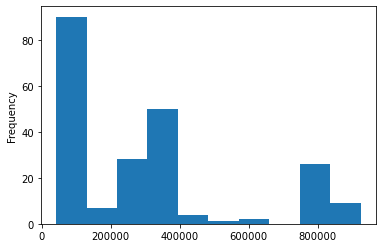

In [53]:
# defines dataframe
data1 = data.groupby(['age', 'region'])['amount'].sum().reset_index()
data1['amount'].plot(kind='hist')

In [54]:
# defines boundaries of the bins using the bins parameter
# [ = includes, ( = not includes
bin_labels_4 = ['<20', '20-40', '40-60', '>60']
cut_bins = [0, 20, 40, 60, 100]
data['age_group'] = pd.cut(data['age'], bins=cut_bins, labels=False)
data.head(10)

,in-store,age,items,amount,region,age_group
0,0,37,4,281.0300,2,1
1,0,35,2,219.5100,2,1
2,1,45,3,1525.7000,4,2
3,1,46,3,715.2500,3,2
4,1,33,4,1937.5000,1,1
5,0,24,3,1314.2000,4,1
6,0,43,6,8.5472,2,2
7,1,66,5,819.9800,3,3
8,1,51,5,908.3100,1,2
9,1,47,3,767.5400,1,2


In [55]:
# drop doubled age column - 'age'
data = data.drop(columns = ['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   in-store   79979 non-null  int64  
 1   items      79979 non-null  int64  
 2   amount     79979 non-null  float64
 3   region     79979 non-null  int64  
 4   age_group  79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


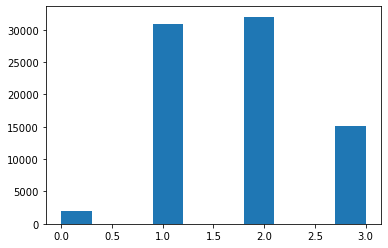

In [56]:
plt.hist(data['age_group'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

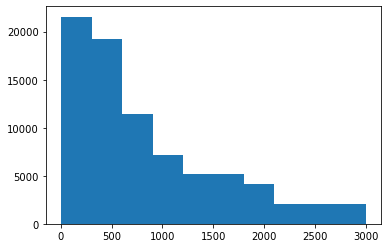

In [57]:
plt.hist(data['amount'])
plt.show

In [58]:
# total sales by region
amount_per_region = data.pivot_table('amount', 'region', aggfunc=np.sum, margins=True)
print(amount_per_region)

              amount
region              
1       1.191762e+07
2       5.040442e+06
3       1.652345e+07
4       3.336699e+07
All     6.684851e+07


<AxesSubplot:xlabel='region'>

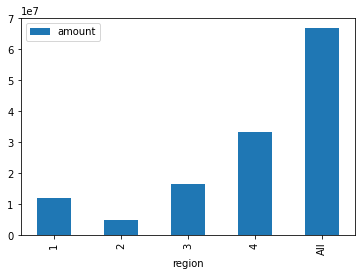

In [59]:
amount_per_region.plot(kind='bar')

In [60]:
# sales by age group - totals
spend_by_age = data.pivot_table('amount', 'age_group', 'region', aggfunc=np.sum, margins=True)
print(spend_by_age)

region                1             2             3             4  \
age_group                                                           
0          3.051833e+05           NaN  6.429315e+05  1.642815e+06   
1          5.622972e+06  1.088469e+06  6.661684e+06  1.645415e+07   
2          4.726905e+06  1.750195e+06  7.140387e+06  1.417588e+07   
3          1.262559e+06  2.201778e+06  2.078451e+06  1.094149e+06   
All        1.191762e+07  5.040442e+06  1.652345e+07  3.336699e+07   

region              All  
age_group                
0          2.590930e+06  
1          2.982727e+07  
2          2.779336e+07  
3          6.636938e+06  
All        6.684851e+07  


<AxesSubplot:xlabel='age_group'>

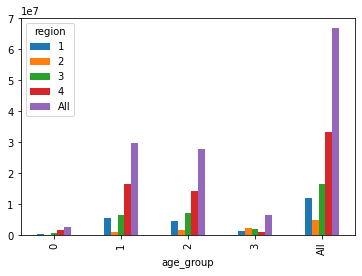

In [61]:
spend_by_age.plot(kind='bar')

In [62]:
# sales by age group - average per transaction
df1 = data.pivot_table('amount', 'age_group', 'region', aggfunc=np.average, margins=True)
print(df1)

region               1           2            3            4          All
age_group                                                                
0          1003.892322         NaN  1571.959731  1301.755420  1311.863360
1           819.555798  249.648954   998.453857  1264.050732   964.971668
2           735.934205  252.662745   931.922036  1286.844312   867.783309
3           524.100896  252.874465   638.148962  1578.859120   440.524198
All         744.990939  252.097741   917.969637  1283.938357   835.825727


<AxesSubplot:xlabel='age_group'>

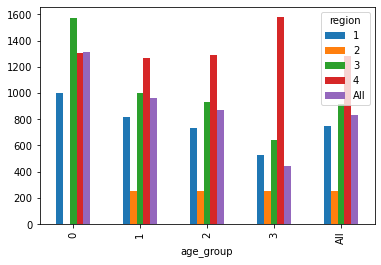

In [63]:
df1.plot(kind='bar')

In [64]:
# correlation matrix
# numbers closer to -1 defining a strong negative correlation, numbers closer to 1 defining a strong positive correlation and numbers closer to 0 meaning little to no correlation.
# medium positive correlation between region and amount 
# meaning sales are higher in certain regions. See amount_per_region plot
# very low correlation between the amount of items per transaction and amount
corr_mat = data.corr()
print(corr_mat)

           in-store     items    amount    region  age_group
in-store   1.000000 -0.003897 -0.085573 -0.133171  -0.132547
items     -0.003897  1.000000  0.000384 -0.001904  -0.000809
amount    -0.085573  0.000384  1.000000  0.403486  -0.262017
region    -0.133171 -0.001904  0.403486  1.000000  -0.219956
age_group -0.132547 -0.000809 -0.262017 -0.219956   1.000000


In [65]:
cov_mat = data.cov()
print(cov_mat)

            in-store     items         amount      region   age_group
in-store    0.250003 -0.004017     -30.860425   -0.075019   -0.051863
items      -0.004017  4.248751       0.570791   -0.004421   -0.001305
amount    -30.860425  0.570791  520221.252295  327.874873 -147.888951
region     -0.075019 -0.004421     327.874873    1.269321   -0.193925
age_group  -0.051863 -0.001305    -147.888951   -0.193925    0.612383


In [66]:
# average sales per transaction per item qty
df2 = data.pivot_table('amount', 'items', 'region', aggfunc=np.average, margins=True)
print(df2)

region           1           2           3            4         All
items                                                              
1       751.450329  257.587746  894.239667  1255.778428  825.401751
2       766.924871  250.012124  931.767999  1297.199268  846.956834
3       743.810869  252.182018  916.421853  1272.761661  836.594085
4       727.300536  249.626762  935.009959  1280.247027  829.619594
5       745.737906  252.399170  911.578511  1277.747343  833.973730
6       740.033224  254.961019  903.035816  1296.386021  835.332638
7       737.791975  251.735042  910.417209  1280.238420  830.026801
8       757.540969  249.882689  937.914856  1310.646915  851.268593
All     744.990939  252.097741  917.969637  1283.938357  835.825727


<AxesSubplot:xlabel='items'>

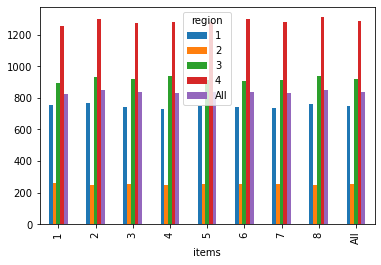

In [67]:
df2.plot(kind='bar')

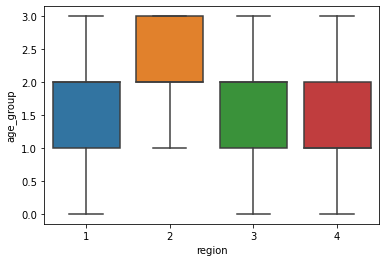

In [68]:
# age variance per region
bxpl1 = sns.boxplot(x='region', y='age_group', data=data)

In [69]:
def get_summary_statistics (bxpl1):
    mean + np.round(np.mean(bxpl1), 2)
    median = np.round(np.median(bxpl1), 2)
    min_value = np.round(bxpl1.min(), 2)
    max_value = np.round(bxpl1.max(), 2)
    quartile_1 = np.round(bxpl1.quantile(0.25), 2)
    quartile_3 = np.round(bxpl1.quantile(0.75), 2)

<AxesSubplot:xlabel='age_group', ylabel='amount'>

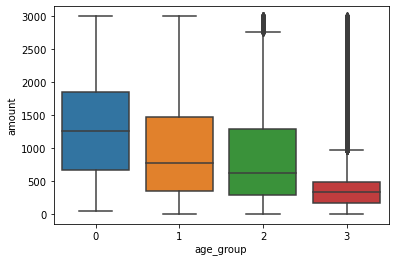

In [70]:
# age v amount - all regions 
sns.boxplot(x='age_group', y='amount', data=data)

<AxesSubplot:xlabel='age_group', ylabel='amount'>

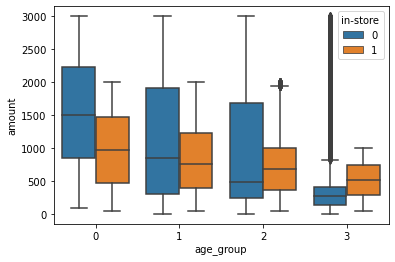

In [71]:
# age v amount by transaction source - all regions
sns.boxplot(x='age_group', y='amount', hue='in-store', data=data)

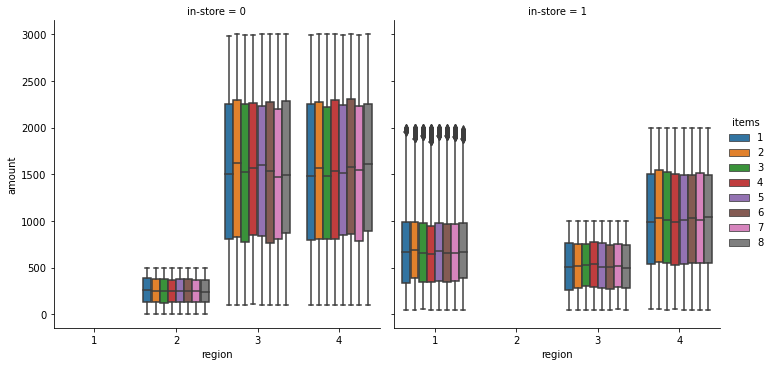

In [72]:
sns.catplot(x='region', y='amount', hue='items', col="in-store", data=data, kind='box')

In [73]:
# selecting a range of rows
data[0:10] 

,in-store,items,amount,region,age_group
0,0,4,281.0300,2,1
1,0,2,219.5100,2,1
2,1,3,1525.7000,4,2
3,1,3,715.2500,3,2
4,1,4,1937.5000,1,1
5,0,3,1314.2000,4,1
6,0,6,8.5472,2,2
7,1,5,819.9800,3,3
8,1,5,908.3100,1,2
9,1,3,767.5400,1,2


In [74]:
# selection a range of columns 
columns = data.iloc[:,0:6]
columns.head()

,in-store,items,amount,region,age_group
0,0,4,281.03,2,1
1,0,2,219.51,2,1
2,1,3,1525.70,4,2
3,1,3,715.25,3,2
4,1,4,1937.50,1,1


In [75]:
# selecting features for model 0
# X = data.iloc[:,0:5] - selects all columns in a given range
X = data[['in-store', 'items', 'amount', 'age_group']]
print('data sample')
X.head()

data sample


,in-store,items,amount,age_group
0,0,4,281.03,1
1,0,2,219.51,1
2,1,3,1525.70,2
3,1,3,715.25,2
4,1,4,1937.50,1


In [76]:
# selecting dependent variable
y = data['region']

In [101]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
X_train.shape, y_train.shape

((55985, 4), (55985,))

In [106]:
# modeling (Classification)
algo = DecisionTreeClassifier(max_depth = 3)
model = algo.fit(X_train,y_train)

In [107]:
# predictions
preds = model.predict(X_test)

In [108]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.71      0.52      4838
           2       0.88      1.00      0.94      5979
           3       0.55      0.08      0.14      5391
           4       0.65      0.68      0.67      7786

    accuracy                           0.63     23994
   macro avg       0.62      0.62      0.57     23994
weighted avg       0.64      0.63      0.59     23994



In [109]:
from sklearn.tree import plot_tree

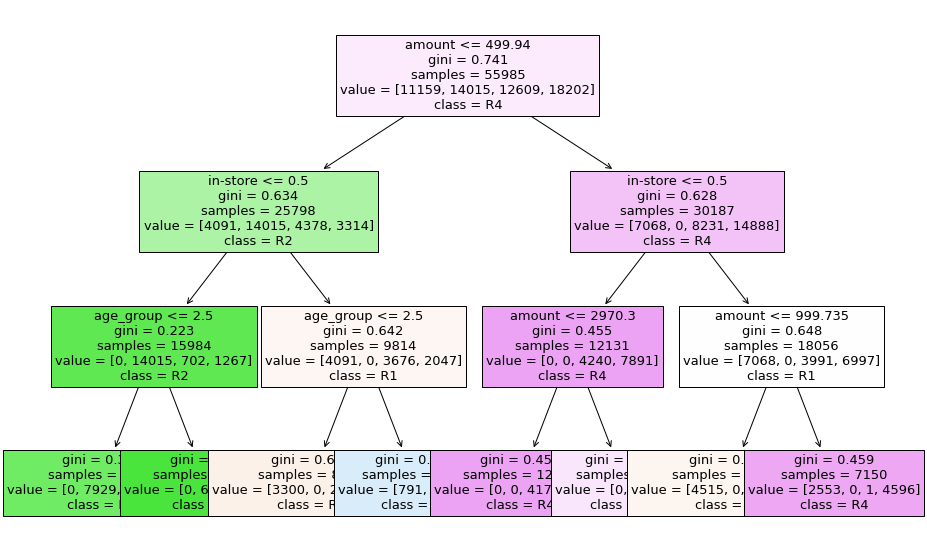

In [110]:
plt.figure(figsize=(15,10))
tree1 = plot_tree(model,
                  feature_names = X.columns,
                  class_names = ['R1', 'R2', 'R3', 'R4'],
                  filled = True,
                  fontsize = 13)

In [114]:
from sklearn.model_selection import cross_val_score

In [120]:
model = DecisionTreeClassifier()

In [122]:
# cv = # of folds being held out
print(cross_val_score(model, X, y, cv=3))

[0.55472618 0.55390098 0.55275892]


In [115]:
# selecting features for model 1 - in-store as dependant
# X = data.iloc[:,0:5] - selects all columns in a given range
X1 = data[['region', 'items', 'amount', 'age_group']]
X1.head()

,region,items,amount,age_group
0,2,4,281.03,1
1,2,2,219.51,1
2,4,3,1525.70,2
3,3,3,715.25,2
4,1,4,1937.50,1


In [116]:
y1 = data['in-store']
print(y1.head())

0    0
1    0
2    1
3    1
4    1
Name: in-store, dtype: int64


In [117]:
# train/test dependant 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = .30, random_state = 123)
print(X_train1.shape, y_train1.shape)
results_1 = []
names_1 = []

(55985, 4) (55985,)


In [118]:
# modeling (Classification)
algo = DecisionTreeClassifier(max_depth = 3)
model1 = algo.fit(X_train1,y_train1)
preds1 = model1.predict(X_test1)
print(classification_report(y_test1, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11874
           1       1.00      0.68      0.81     12120
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.35     23994
   macro avg       0.20      0.14      0.16     23994
weighted avg       0.51      0.35      0.41     23994



/Users/franciscosanchez/opt/anaconda3/envs/UTDataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/franciscosanchez/opt/anaconda3/envs/UTDataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/franciscosanchez/opt/anaconda3/envs/UTDataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be